## Machine Learning Project 2
Create a K-means clustering algorithm to group customers of a retail store based on their purchase history

In [14]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Here we Load the CSV file
file_path = r'Mall_Customers.csv'  
data = pd.read_csv(file_path)

In [15]:
# Select features for clustering: Annual Income and Spending Score
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Find the optimal no of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

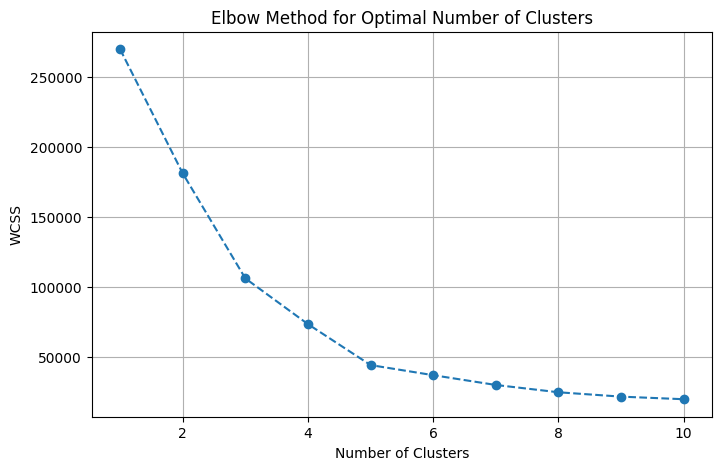

In [16]:
# To  plot the Elbow Method to visualize the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

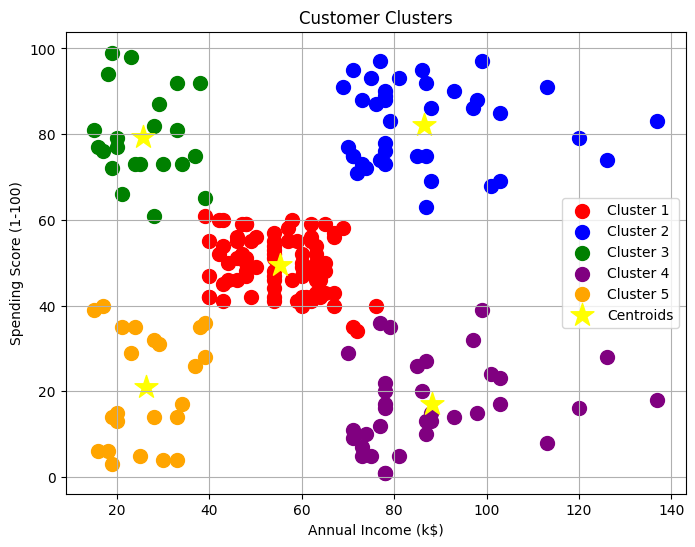

In [17]:
# Applying K-means with the optimal number of clusters (let's choose 5 based on the elbow method)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Adding the cluster labels to the original data
data['Cluster'] = y_kmeans

# Visualizing the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X.values[y_kmeans == 0, 0], X.values[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X.values[y_kmeans == 1, 0], X.values[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X.values[y_kmeans == 2, 0], X.values[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X.values[y_kmeans == 3, 0], X.values[y_kmeans == 3, 1], s=100, c='purple', label='Cluster 4')
plt.scatter(X.values[y_kmeans == 4, 0], X.values[y_kmeans == 4, 1], s=100, c='orange', label='Cluster 5')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', marker='*', label='Centroids')
plt.title('Customer Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()